<a href="https://colab.research.google.com/github/codeboy47/Advanced-Data-Structures-And-Algorithms/blob/master/Akshit_Singh_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [625]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime
from datetime import date

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

from scipy.stats import zscore

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import matplotlib.style as style
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [626]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [627]:
# loading csv File
file_path = '/content/drive/MyDrive/Bike Sharing Demand Prediction/SeoulBikeData.csv'
seoul_df = pd.read_csv(file_path, index_col = False, encoding='unicode_escape')

In [628]:
# printing shape
print("Shape of the Dataset:", seoul_df.shape)

Shape of the Dataset: (8760, 14)


In [629]:
# using head function to get first 5 rows
seoul_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [630]:
# To get the descriptive summary of dataset
seoul_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [631]:
# studying the information about columns and non-null values
seoul_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [632]:
# checking if any null values are present in our dataset
seoul_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There are no null values in the Dataframe

In [633]:
# checking duplicates in our dataset
len(seoul_df[seoul_df.duplicated()])

0

As we can see there are no duplicate rows in our dataset

In [634]:
# count of unique elements in each column
seoul_df.nunique().sort_values()

Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

In [635]:
# converting the type of Hour column into category
seoul_df['Hour'] = seoul_df['Hour'].astype('category')

## Exploratory Data Analysis

In [636]:
# setting the size of the graphs and also style of seaborn
style.use('seaborn-poster')
style.use('ggplot')
sns.set(style = 'darkgrid')

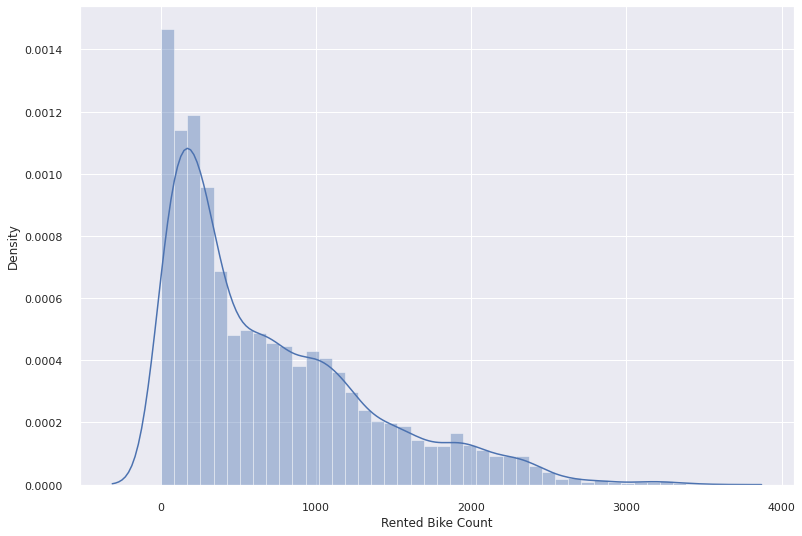

In [637]:
# plotting distribution plot for our dependent variable
sns.distplot(seoul_df['Rented Bike Count'])

Inference: <br>
We can see the positive skewness in the graph for our dependent variable. We can use square-root or log transformation to remove positive skewness from the distribution.

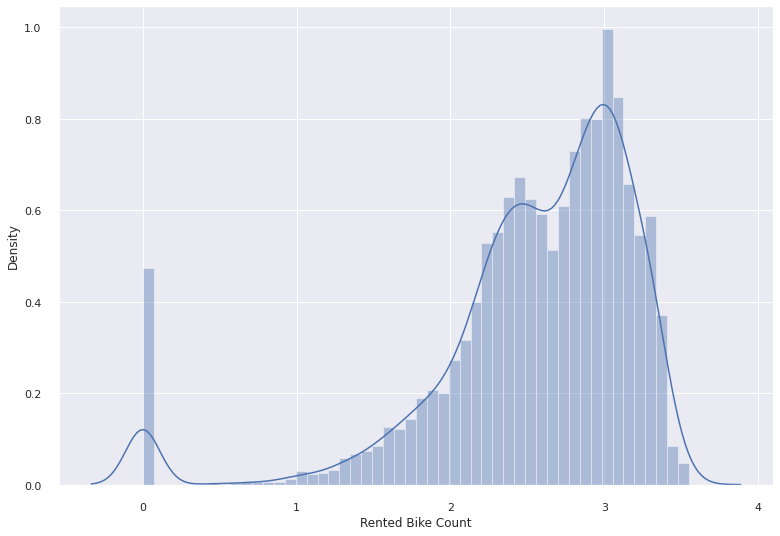

In [638]:
# plotting distribution plot for the log-transformed dependent variable
sns.distplot(np.log10(seoul_df['Rented Bike Count'] - (seoul_df['Rented Bike Count'].min() - 1)))

We are not able to remove skewness using log transformation as now it is negatively skewed.
<br>
Trying square-root transformation.

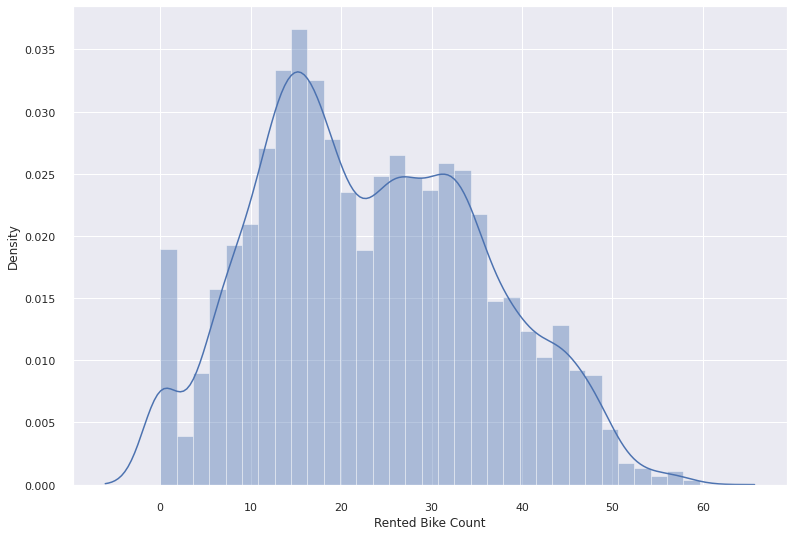

In [639]:
# plotting distribution plot for square-root of dependent variable
sns.distplot(np.sqrt(seoul_df['Rented Bike Count']))

As we can see we are able to remove positive skewness from our distribution using square-root transformation.

## Understanding numerical features

In [640]:
# finding numerical_features from the dataset
numerical_features = seoul_df.describe().columns
numerical_features

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

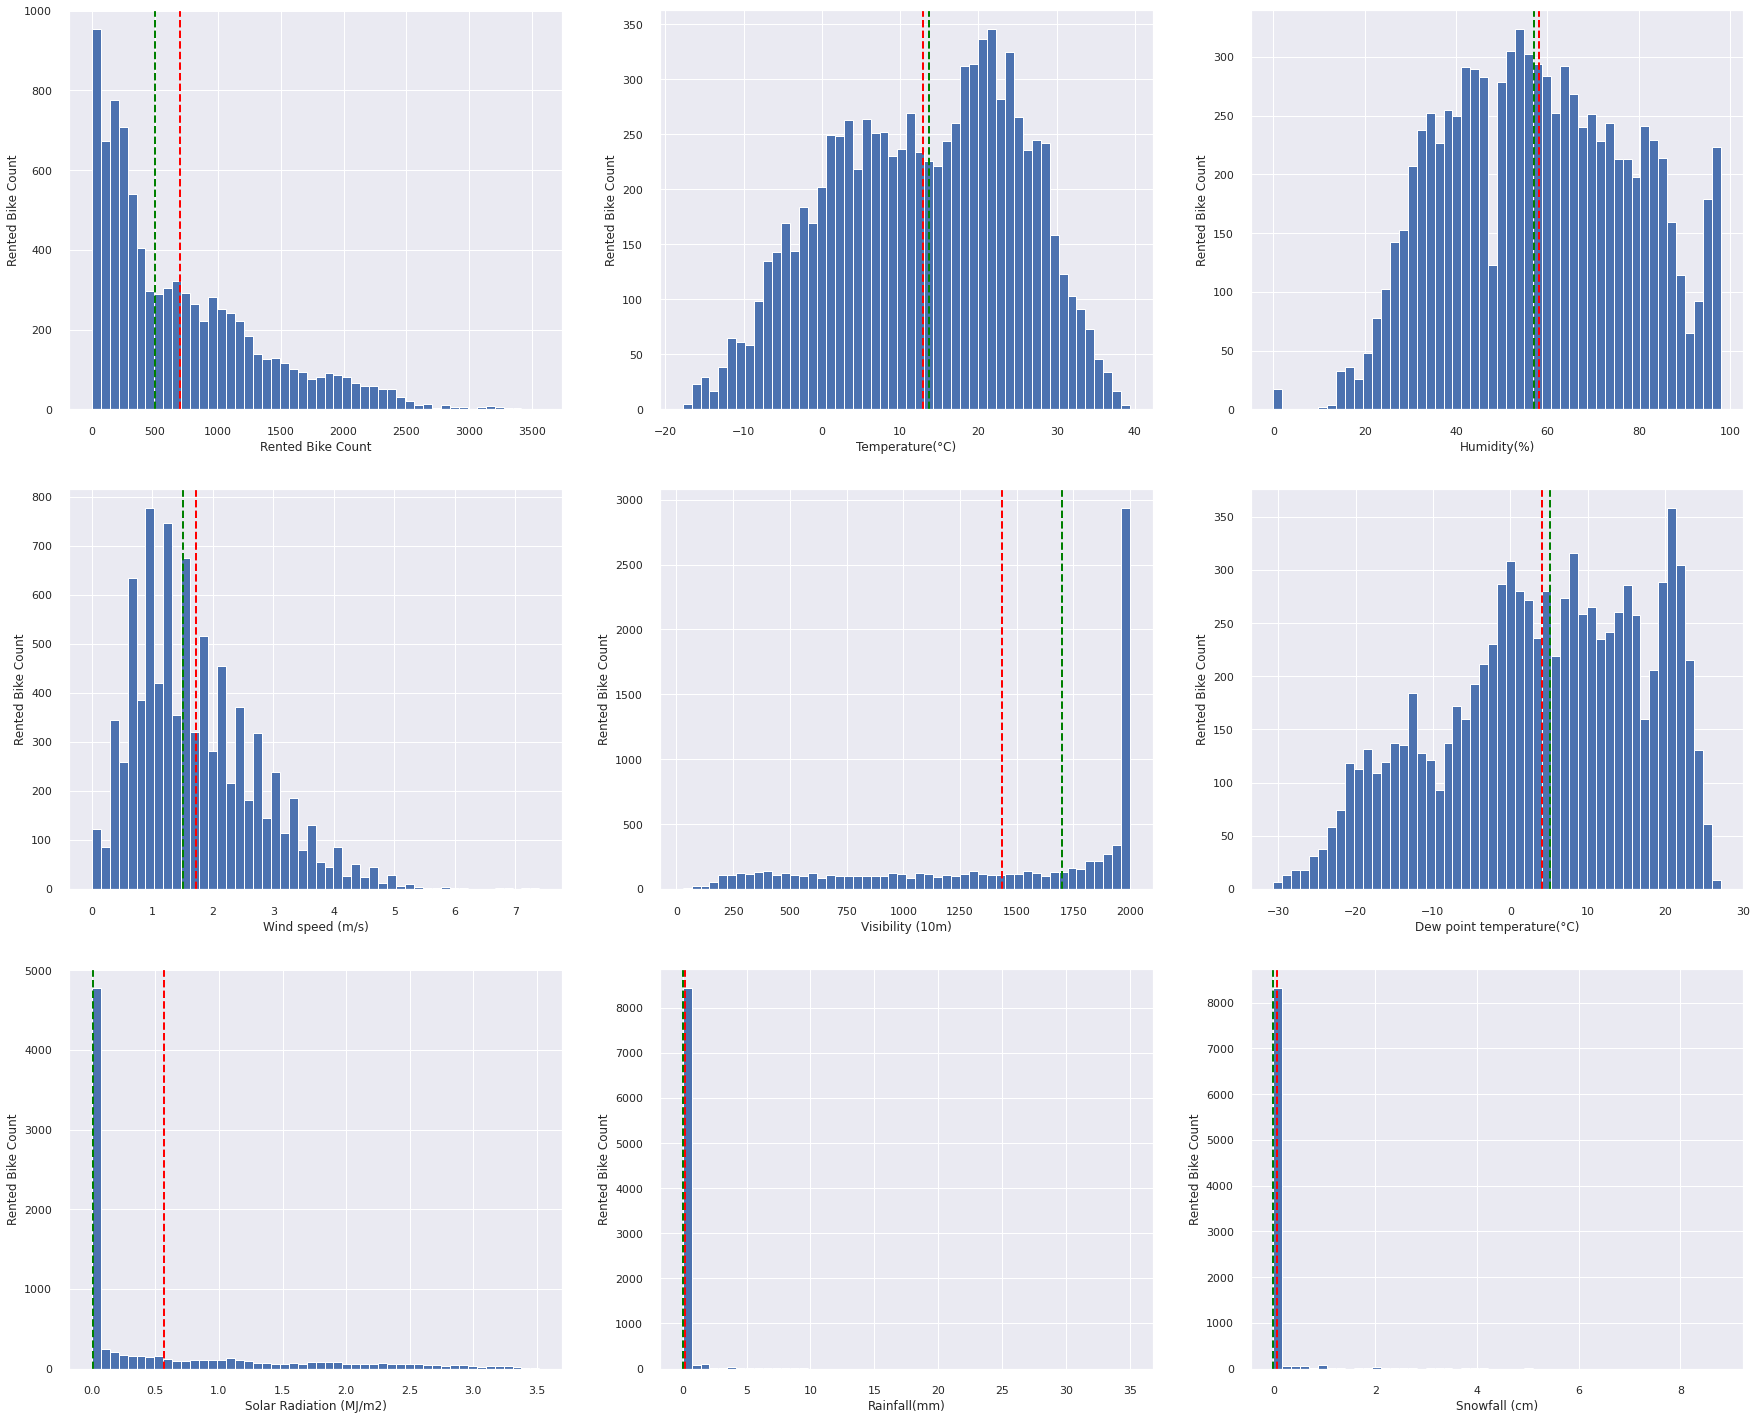

In [641]:
# plotting a histogram for each numerical feature
i = 0
plt.figure(figsize=(30, 25))
for feature in numerical_features:
    ax = plt.subplot(3, 3, i+1)
    seoul_df[feature].hist(bins = 50, ax = ax)
    plt.xlabel(feature)
    plt.ylabel('Rented Bike Count')
    ax.axvline(seoul_df[feature].mean(), color = 'red', linestyle = 'dashed', linewidth = 2)
    ax.axvline(seoul_df[feature].median(), color = 'green', linestyle = 'dashed', linewidth = 2)
    i += 1

plt.show()

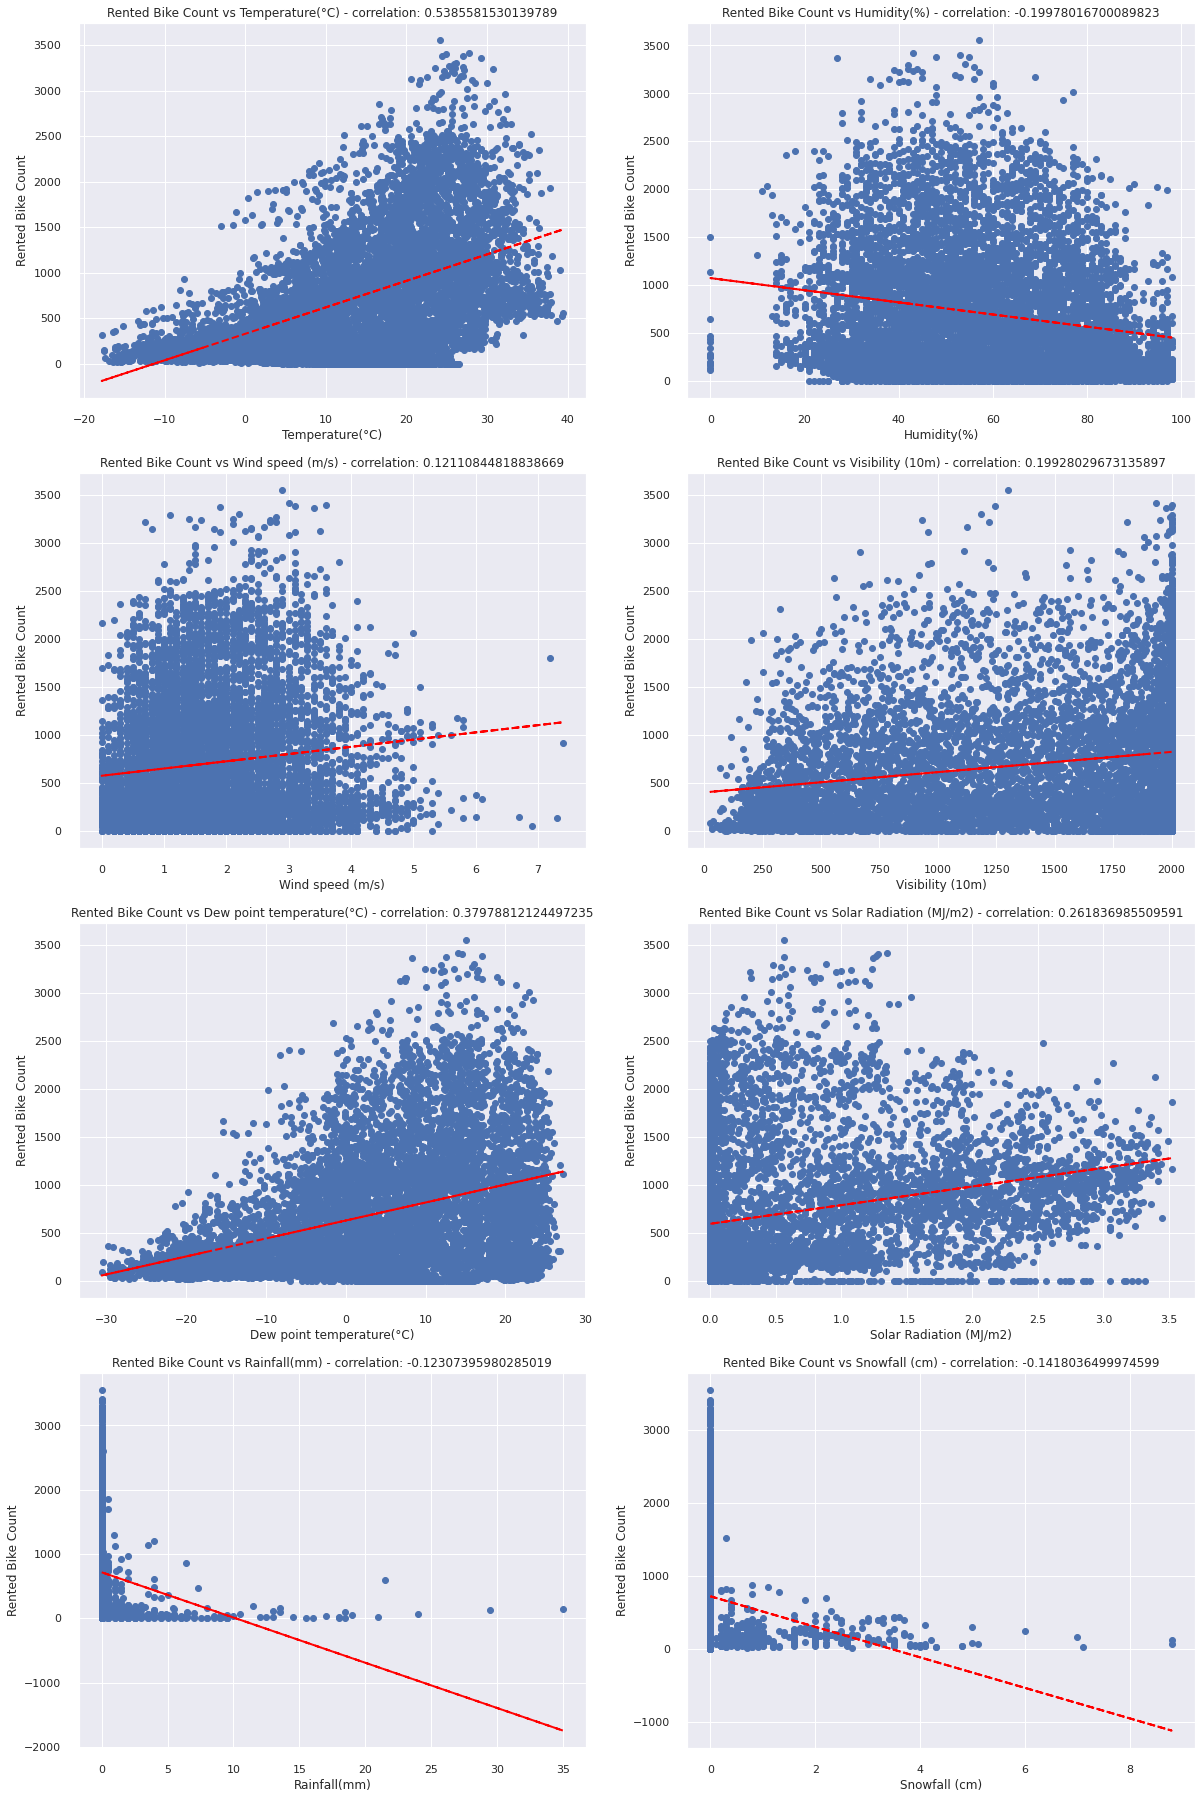

In [642]:
# plotting scatter plot to understand the relationship between dependent and independent variables
i = 0
plt.figure(figsize=(20, 40))
for feature in numerical_features[1:]:
    ax = plt.subplot(5, 2, i+1)
    independent_var = seoul_df[feature]
    dependent_var = seoul_df['Rented Bike Count']
    correlation = independent_var.corr(dependent_var)
    plt.scatter(x = independent_var, y = dependent_var)
    plt.xlabel(feature)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + feature + ' - correlation: ' + str(correlation))
    z = np.polyfit(independent_var, dependent_var, 1)
    y_pred = np.poly1d(z)(independent_var)
    plt.plot(independent_var, y_pred, color = 'red', linestyle = 'dashed', linewidth = 2)
    i += 1
    
plt.show()

Inference: 
*  Rented Bike Count increases, when temperature increases.
*  Rented Bike Count is low when the percentage of humidity is high in the air.
*  Also the demand for the rented bike is very high when rainfall and snowfall are low.

From the above graphs, we can see a few outliers in Humidity, Wind speed, Rainfall and Snowfall features.

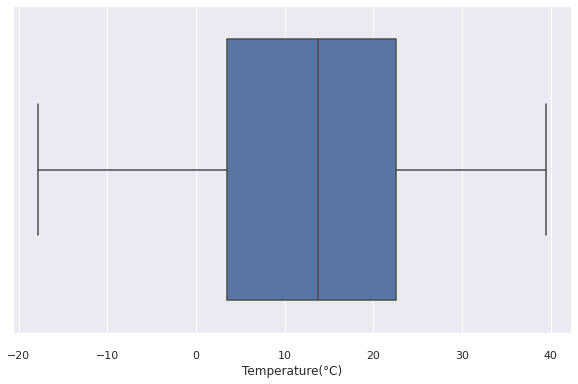

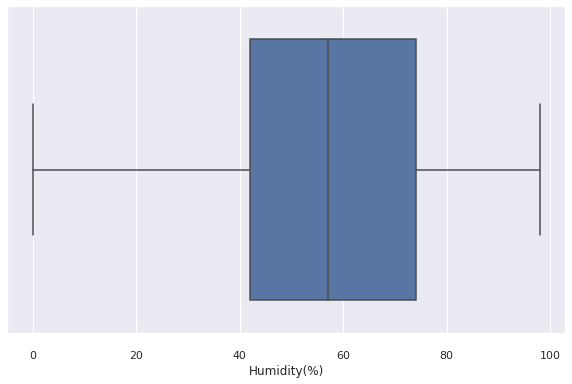

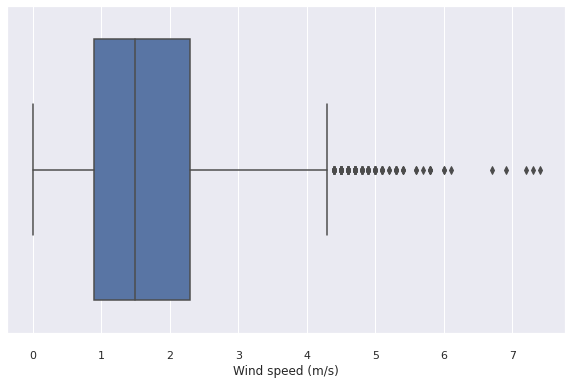

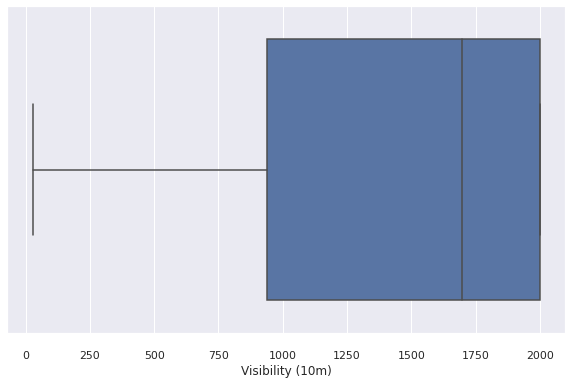

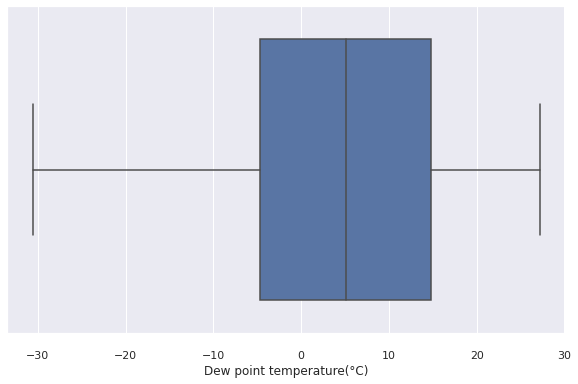

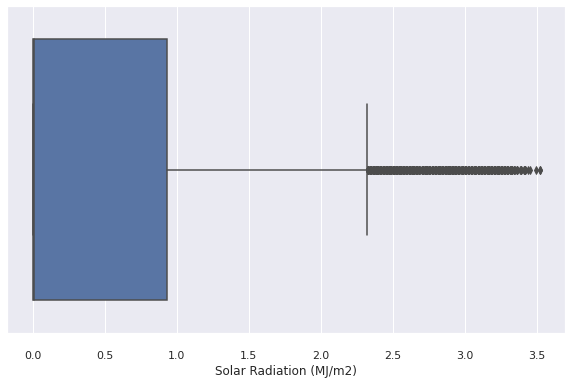

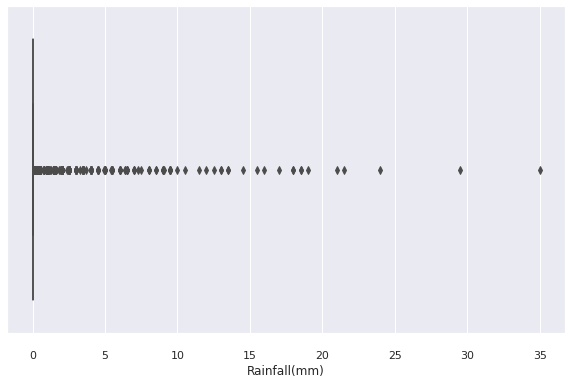

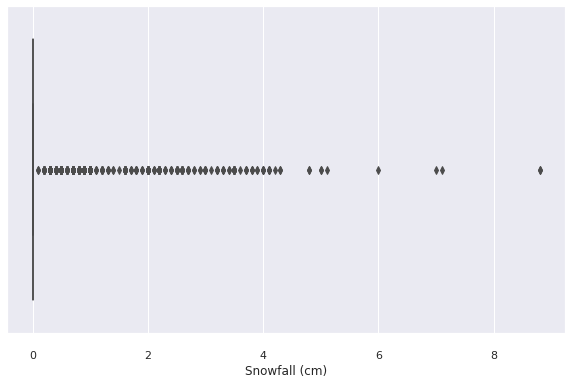

In [643]:
# plotting the box plot for numerical_features
for feature in numerical_features[1:]:
    plt.figure(figsize = (10, 6))
    sns.boxplot(x = seoul_df[feature])
plt.show()

From the above box plot as well, we see that there are outliers present in Wind speed, Solar Radiation, Rainfall and Snowfall features.

### Removing outliers from our dataset

In [644]:
# renaming columns
seoul_df.rename(columns = {'Temperature(°C)': 'Temperature', 'Humidity(%)': 'Humidity', 'Wind speed (m/s)': 'Wind speed', 'Visibility (10m)': 'Visibility', 'Dew point temperature(°C)': 'Dew point temperature', 'Solar Radiation (MJ/m2)': 'Solar Radiation', 'Rainfall(mm)': 'Rainfall', 'Snowfall (cm)': 'Snowfall'}, inplace = True)

In [645]:
# finding numerical_features from the dataset
numerical_features = seoul_df.describe().columns

In [646]:
# count of outliers for Humidity
seoul_df[seoul_df['Humidity'] == 0]['Humidity'].count()

17

In [647]:
# count of outliers for Wind speed
seoul_df[seoul_df['Wind speed'] >= 4.5]['Wind speed'].count()

144

In [648]:
# count of outliers for Solar Radiation
seoul_df[seoul_df['Solar Radiation'] >= 2.5]['Solar Radiation'].count()

499

In [649]:
# count of outliers for Rainfall
seoul_df[seoul_df['Rainfall'] >= 10]['Rainfall'].count()

23

In [650]:
# count of outliers for Snowfall
seoul_df[seoul_df['Snowfall'] >= 4]['Snowfall'].count()

21

In [651]:
# removing outliers
seoul_df = seoul_df[seoul_df['Humidity'] > 0]
seoul_df = seoul_df[seoul_df['Wind speed'] < 4.5]
seoul_df = seoul_df[seoul_df['Solar Radiation'] < 2.5]
seoul_df = seoul_df[seoul_df['Rainfall'] < 10]
seoul_df = seoul_df[seoul_df['Snowfall'] < 4]

### Checking multicollinearity

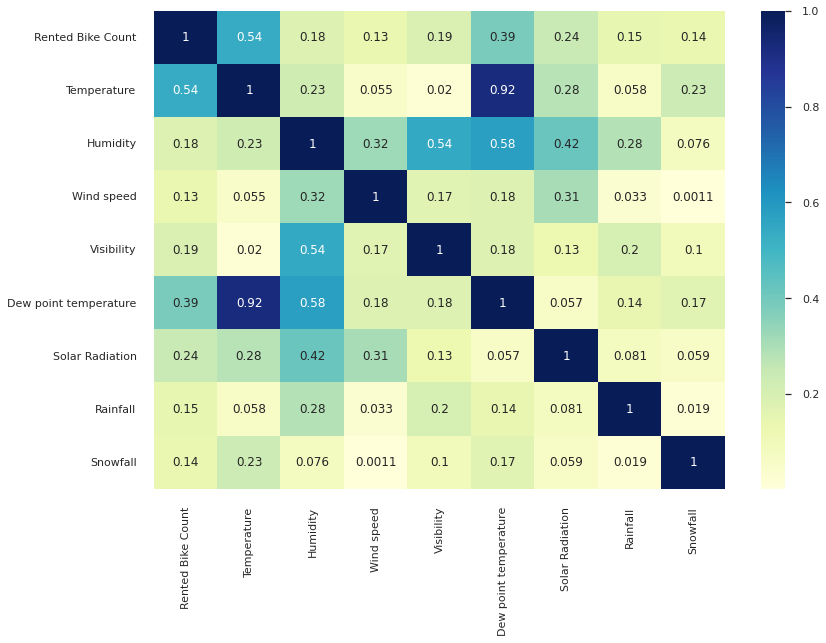

In [652]:
# Correlation between numerical features using heatmap
ax = sns.heatmap(abs(seoul_df[numerical_features].corr()), annot = True, cmap="YlGnBu")

Inference: <br>
We can see a high correlation between **Temperature** and **Dew point temperature** with a value of 0.91.
<br>
We can drop either of the two but since **Temperature** has more correlation with **Rented Bike Count** in comparison to **Dew point temperature**. So we will drop the **Dew point temperature** feature.

In [653]:
# Checking multicollinearity by calculating VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["independent_variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

In [654]:
calculate_vif(seoul_df[[i for i in numerical_features if i not in ['Rented Bike Count']]])

,independent_variables,VIF
0,Temperature,28.012254
1,Humidity,5.294308
2,Wind speed,4.640317
3,Visibility,8.924843
4,Dew point temperature,15.725322
5,Solar Radiation,2.363219
6,Rainfall,1.120123
7,Snowfall,1.124131


In [655]:
# removing the Dew point temperature to check VIF as it has less correlation with our dependent variable
calculate_vif(seoul_df[[i for i in numerical_features if i not in ['Rented Bike Count', 'Dew point temperature']]])

,independent_variables,VIF
0,Temperature,2.899187
1,Humidity,4.966258
2,Wind speed,4.155954
3,Visibility,4.388559
4,Solar Radiation,1.948663
5,Rainfall,1.118092
6,Snowfall,1.124130


Inference: <br>
After removing **Dew point temperature** we can see that the VIF values for all the features are less than or equal to 5 which means they are not correlated with each other. Hence we have removed the multicollinearity among the features.

In [656]:
# removing the Dew point temperature from numerical_features 
numerical_features = list(set(numerical_features) - {'Dew point temperature'})

## Understanding categorical features

In [657]:
categorical_features = seoul_df.describe(include = ['object', 'category']).columns
categorical_features

Index(['Date', 'Hour', 'Seasons', 'Holiday', 'Functioning Day'], dtype='object')

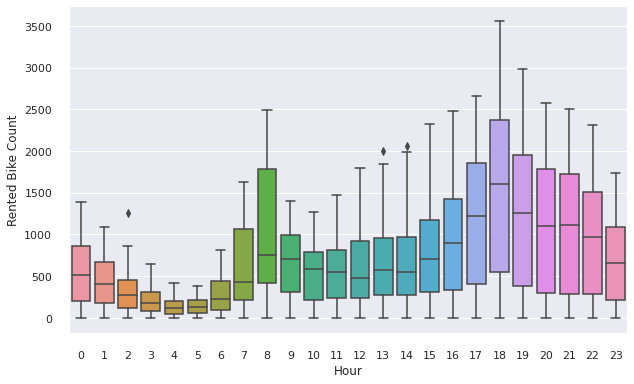

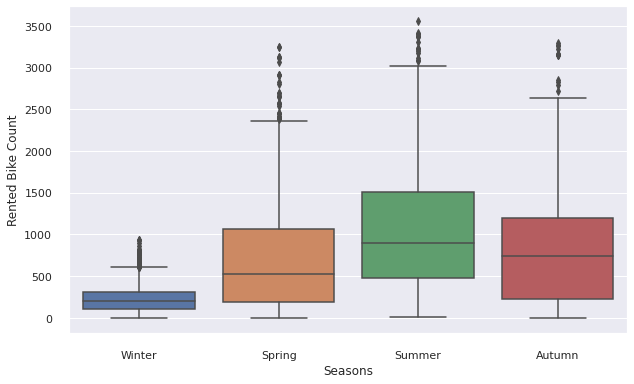

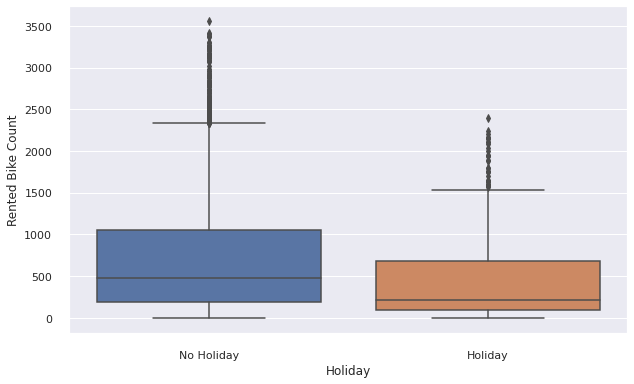

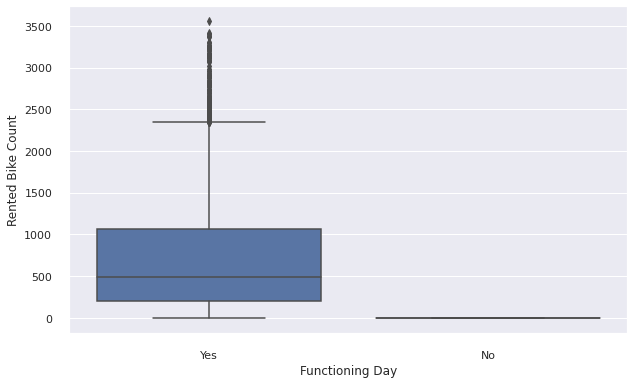

In [658]:
# plotting the box plot for categorical_features
for feature in categorical_features[1:]:
    plt.figure(figsize = (10, 6))
    sns.boxplot(y = seoul_df['Rented Bike Count'], x = seoul_df[feature])
    plt.ylabel('Rented Bike Count')
plt.show()

Text(0, 0.5, 'Rented Bike Count')

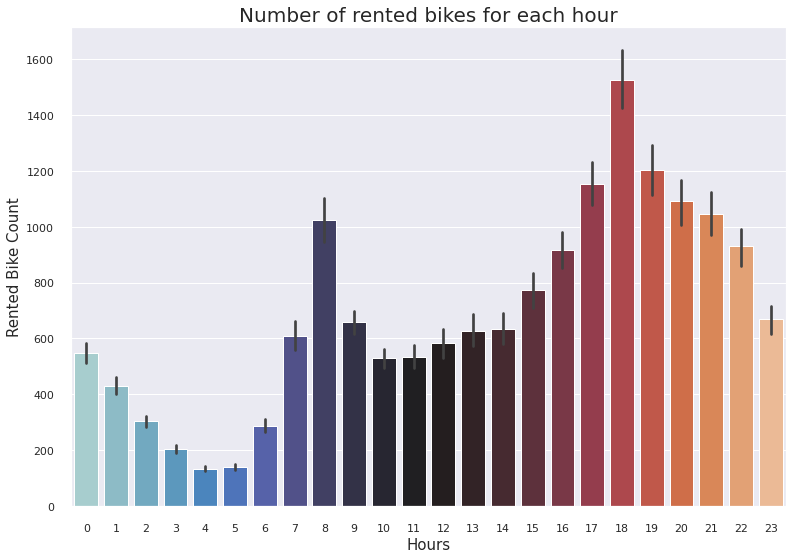

In [659]:
# setting seaborn plotting aesthetics for creating a bar chart
sns.barplot(
    x = seoul_df['Hour'],
    y = seoul_df['Rented Bike Count'],
    palette = ('icefire')
)
plt.title('Number of rented bikes for each hour', fontsize = 20)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Rented Bike Count', fontsize = 15)

Inference: <br>
* From the above graph, we can see that the bikes are in high demand in the evening with a peak time at 6 pm.
* The demand is high at 8 am in the morning as well.

Text(0.5, 1.0, 'Rented bike count on holidays')

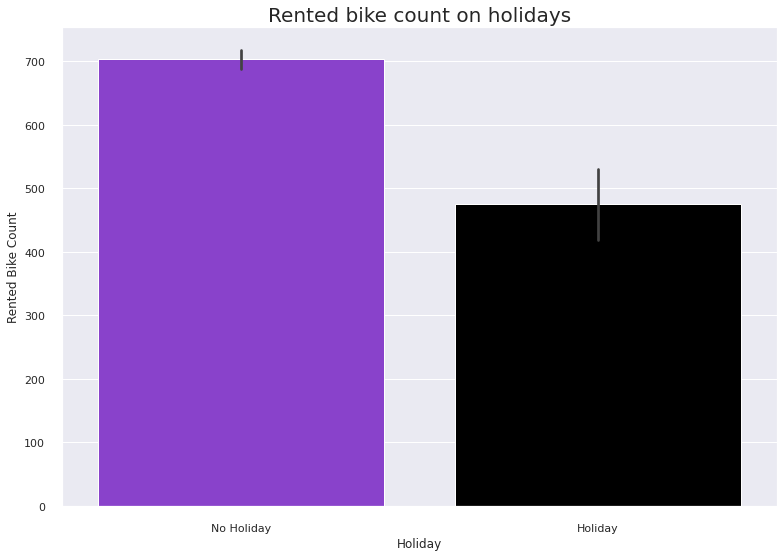

In [660]:
# setting seaborn plotting aesthetics for creating a bar chart
sns.barplot(
    x = seoul_df['Holiday'],
    y = seoul_df['Rented Bike Count'],
    palette = ['blueviolet', 'black']
)
plt.title('Rented bike count on holidays', fontsize = 20)

Inference: <br>
During holidays the demand for rented bikes is less compared to when there are no holidays.  

Text(0.5, 1.0, 'Rented bike count on holidays for every hour')

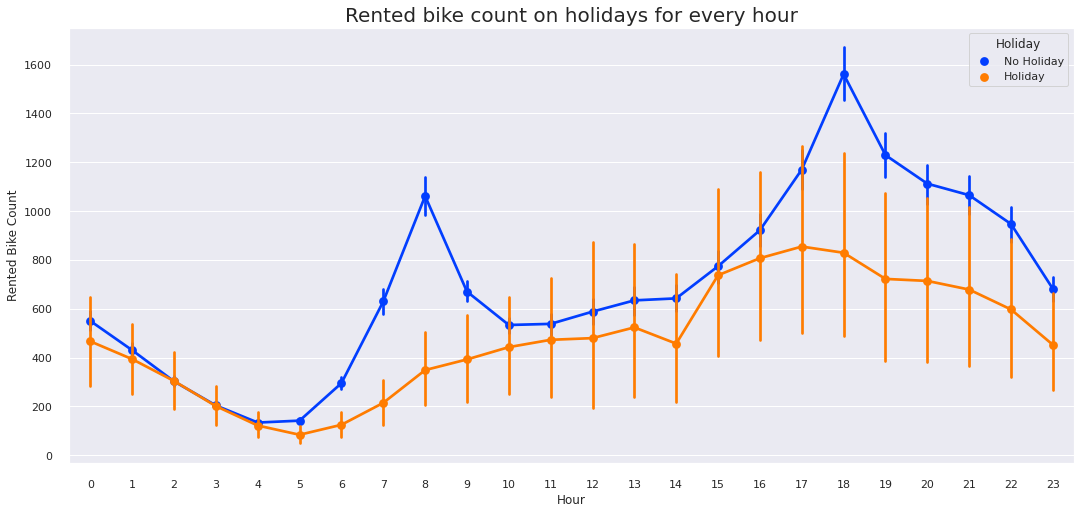

In [661]:
# setting seaborn plotting aesthetics for creating a pointplot
fig, ax = plt.subplots(figsize=(18,8))
sns.pointplot(
    x = seoul_df['Hour'],
    y = seoul_df['Rented Bike Count'],
    hue = seoul_df['Holiday'],
    palette = sns.color_palette('bright')
)
plt.title('Rented bike count on holidays for every hour', fontsize = 20)

Inference:


*  When there is no holiday, we can see 2 spikes in the graph one at 8 am and one at 6 pm. So in the morning and evening, the demand for rented bikes is high.
*  When there are holidays the demand is quite low during the entire day.



### Feature Engineering

In [662]:
# making a copy of the dataset
seoul_df_engg = seoul_df.copy()

In [663]:
#label encoding
encoders = {
    'Holiday': {'Holiday': 1, 'No Holiday': 0},
    'Functioning Day': {'Yes': 1, 'No': 0}
}
seoul_df_engg.replace(encoders, inplace = True)

In [664]:
# hot encoding
seoul_df_engg = pd.get_dummies(seoul_df_engg, columns = ['Seasons'], prefix = ['Season'])

In [665]:
# checking the features after the encoding
seoul_df_engg.head(2)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday,Functioning Day,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1


In [666]:
# combining numerical and categorical features
features = [column for column in seoul_df_engg.columns if column not in ['Rented Bike Count', 'Dew point temperature', 'Date']]
features

['Hour',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Solar Radiation',
 'Rainfall',
 'Snowfall',
 'Holiday',
 'Functioning Day',
 'Season_Autumn',
 'Season_Spring',
 'Season_Summer',
 'Season_Winter']

### Using power transformation

In [667]:
# applying power transformer to make the probability distribution of the numerical features more Gaussian
pt = PowerTransformer()
seoul_df_engg[numerical_features] = pt.fit_transform(seoul_df_engg[numerical_features])

In [668]:
X = seoul_df_engg[features]

In [669]:
y = seoul_df_engg['Rented Bike Count']

## Regression Models

In [670]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42) 
print(X_train.shape)
print(X_test.shape)

(6869, 14)
(1213, 14)


In [671]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Implementing Linear Regression

In [672]:
reg = LinearRegression().fit(X_train, y_train)

In [673]:
reg.intercept_

-0.00019785549221013125

In [674]:
reg.coef_

array([ 2.69239273e-01,  3.96196726e-01, -1.45106654e-01,  1.40067068e-05,
        1.37006835e-02,  6.43412379e-02, -2.59645025e-01,  1.38117079e-02,
       -4.71815566e-02,  4.88221661e-01,  1.15673896e-01,  1.55001541e-02,
        3.54371294e-02, -1.65687388e-01])

In [675]:
y_pred = reg.predict(X_test)

In [676]:
def print_metrics(actual, predicted):
  print(f'MSE is {mean_squared_error(actual, predicted)}')
  print(f'RMSE is {math.sqrt(mean_squared_error(actual, predicted))}')
  print(f'MAE is {mean_absolute_error(actual, predicted)}')
  print(f'MAPE is {mean_absolute_percentage_error(actual, predicted)}')
  print(f'R2 is {r2_score(actual, predicted)}')

In [677]:
print_metrics(y_test, y_pred)

MSE is 0.2712827214861314
RMSE is 0.5208480790846132
MAE is 0.41018550792133385
MAPE is 2.195427265024494
R2 is 0.7208149836709121


In [678]:
# Adjusted R2
def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))

In [679]:
adjusted_r2(len(y_train), len(features), y_test, y_pred)

0.7202447195581885

In [680]:
accuracies = cross_val_score(reg, X_train, y_train, cv = 10)
print('Cross val score for Training Data:', accuracies.mean()*100)

Cross val score for Training Data: 71.55155263149877


In [681]:
dt_reg = DecisionTreeRegressor(max_leaf_nodes=9, random_state=0)
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, random_state=0)

In [682]:
y_pred = dt_reg.predict(X_test)

In [683]:
print_metrics(y_test, y_pred)

MSE is 0.3078684778283335
RMSE is 0.5548589711163852
MAE is 0.4369380507460803
MAPE is 3.0551310249524115
R2 is 0.683163507285484


In [684]:
adjusted_r2(len(y_train), len(features), y_test, y_pred)

0.6825163361594258

In [685]:
accuracies = cross_val_score(dt_reg, X_train, y_train, cv = 10)
print('Cross val score for Training Data:', accuracies.mean()*100)

Cross val score for Training Data: 68.7166473126905
